In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import gmaps

In [2]:
url = "cal.csv"
cal = pd.read_csv(url)
cal

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition
0,728,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear
1,729,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear
2,730,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear
3,731,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear
4,732,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...
663199,2974330,2,2019-08-23 18:03:25,34.002480,-117.379360,Pomona Fwy E,Riverside,Riverside,CA,92501,86.0,Fair
663200,2974331,2,2019-08-23 19:11:30,32.766960,-117.148060,I-8 W,San Diego,San Diego,CA,92108,70.0,Fair
663201,2974332,2,2019-08-23 19:00:21,33.775450,-117.847790,Garden Grove Fwy,Orange,Orange,CA,92866,73.0,Partly Cloudy
663202,2974333,2,2019-08-23 19:00:21,33.992460,-118.403020,San Diego Fwy S,Culver City,Los Angeles,CA,90230,71.0,Fair


In [4]:
county_count = cal.groupby('County').count()
city_count = cal.groupby('City').count()

city_count

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,County,State,Zipcode,Temperature(F),Weather_Condition
City,,,,,,,,,,,
Acampo,398,398,398,398,398,398,398,398,398,397,397
Acton,1298,1298,1298,1298,1298,1298,1298,1298,1298,1297,1297
Adelanto,60,60,60,60,60,60,60,60,60,19,57
Adin,1,1,1,1,1,1,1,1,1,1,1
Agoura Hills,656,656,656,656,656,656,656,656,656,655,655
...,...,...,...,...,...,...,...,...,...,...,...
Yuba City,233,233,233,233,233,233,233,233,233,232,231
Yucaipa,141,141,141,141,141,141,141,141,141,141,141
Yucca Valley,38,38,38,38,38,38,38,38,38,38,38


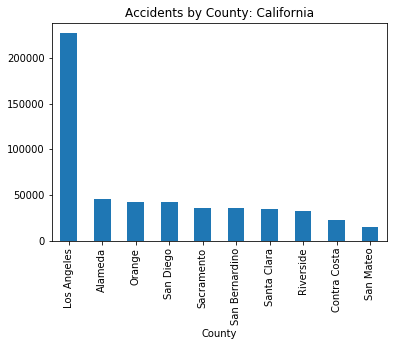

In [5]:
# California counties by number of accidents (normalized by population)
counties = county_count.Severity.sort_values(ascending = False)
top_counties = counties.nlargest(n=10)

counties_plot = top_counties.plot(kind = 'bar', title = 'Accidents by County: California')

# to adjust for population we will need the data for population from the census
# api.census.gov/data/2016/pep/population?get=POP,GEONAME&for=region:*&DATE=9&key=YOUR_KEY
# COUNTY	County FIPS code https://api.census.gov/data/2016/pep/population/variables.html
# 050 is State > County https://api.census.gov/data/2016/pep/population

# pop_url = https://api.census.gov/data/2016/pep/population

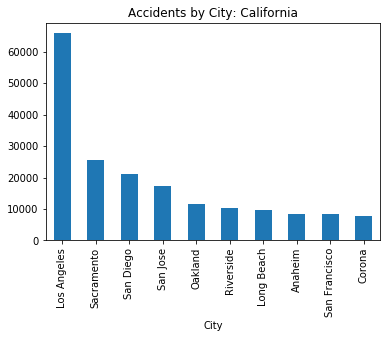

In [6]:
# Top 5 Cities that have the most accidents
cities_count = city_count.Severity.sort_values(ascending = False)
top_cities = cities_count.nlargest(n =10)

cities_plot = top_cities.plot(kind = 'bar', title = 'Accidents by City: California')

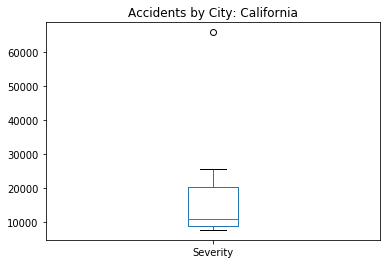

In [7]:
box_cities = top_cities.plot(kind = 'box', title = 'Accidents by City: California')
# #boxplot_c = top_cities.boxplot(column = ['Los Angeles', 
#                                          'Sacramento', 
#                                          'San Diego', 
#                                          'San Jose', 
#                                          'Oakland', 
#                                          'Riverside', 
#                                          'Long Beach', 
#                                          'Anaheim', 
#                                          'San Francisco', 
#                                          'Corona'])

In [8]:
# Import API key
from api_keys import g_key

In [9]:
#State heat map with markers for accidents
gmaps.configure(api_key=g_key)

# Store latitude and longitude in locations
locations = cal[["Start_Lat", "Start_Lng"]]

accidents = cal['Severity']

In [10]:
cal_test = cal[0:100]
cal_test

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition
0,728,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear
1,729,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear
2,730,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear
3,731,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear
4,732,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...
95,823,2,2016-06-21 23:46:57,38.714298,-121.540237,W Elverta Rd,Sacramento,Sacramento,CA,95836,71.1,Clear
96,824,3,2016-06-22 00:29:47,37.692780,-122.101685,I-580 W,Hayward,Alameda,CA,94541,59.0,Clear
97,825,2,2016-06-22 00:29:20,39.267353,-121.028770,State Highway 49,Nevada City,Nevada,CA,95959,73.4,Clear
98,826,2,2016-06-22 00:40:26,39.098984,-122.804314,Foothill Dr,Nice,Lake,CA,95464,64.0,Clear


In [14]:
# Plot Heatmap
fig  = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, dissipating=True, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

#Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
fig.savefig('Accident_Heatmap.png')

AttributeError: 'Figure' object has no attribute 'savefig'

In [ ]:
#Create symbol_ layer
symbol_layer = gmaps.symbol_layer(locations, fill_color='red', stroke_color='red', scale=2)

# Add layer
fig.add_layer(symbol_layer)

#Display figure
symbol_fig